In [3]:
from __future__ import division
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
ratings_train = pd.read_csv('./homework4/data/ratings_train.csv', header=None)
ratings_test = pd.read_csv('./homework4/data/ratings_test.csv', header=None)
ratings_fake = pd.read_csv('./homework4/data/ratings_fake.csv', header=None)

In [6]:
ratings_train.columns = ['user', 'movie', 'rating']
ratings_test.columns = ['user', 'movie', 'rating']
ratings_fake.columns = ['user', 'movie', 'rating']

In [7]:
# A = ratings_fake.pivot(index='user', columns='movie').as_matrix()
A = ratings_train.pivot(index='user', columns='movie').fillna(0).as_matrix()
# A = ratings_test.pivot(index='user', columns='movie') #.as_matrix()

In [130]:
def optimize_U(U, V, B, C, mu, A):
    Uis = []
    for i in range(m):
        right = 0, 
        left = 0
        if not pd.Series(A[i]).isnull().all():
            for j in range(n):
                if A[i, j]:
                    right += (B[i] + C[j] + mu - A[i,j]) * V[j]
                    left += np.outer(V[j], V[j].T)
            Ui = -np.dot(np.linalg.inv(left), right)
        else:
            Ui = U[i]
        Uis.append(Ui)
    return np.array(Uis)

In [94]:
np.linalg.inv([[np.outer(U[0], U[0].T).sum()]])

array([[ 55.62035414]])

In [111]:
def optimize_U(U, V, B, C, mu, A):
    for i in range(m):
        np.outer(U, U.T).sum(axis=0) * (B[i] + C + mu - A[i, :]) * U[i]

In [141]:
def optimize_V(U, V, B, C, mu, A):
    Vjs = []
    for j in range(n):
        right = 0, 
        left = 0
        if not pd.Series(A[:, j]).isnull().all():  
            for i in range(m):
                if A[i, j]:
                    pass_ = True
                    right += (B[i] + C[j] + mu - A[i, j]) * U[i]
                    left += np.outer(U[i], U[i].T)
                else:
                    Vj = V[j]
                    pass_ = False
            if pass_:
                Vj = -np.dot(np.linalg.inv(left), right)
        else:
            Vj = V[j]
        Vjs.append(Vj)
    return np.array(Vjs)

In [142]:
def optimize_B(U, V, B, C, mu, A):
    Bis = []
    for i in range(m):
        b = 0
        if not pd.Series(A[i]).isnull().all():         
            for j in range(n):
                if A[i,j]:
                    b += -(np.dot(U[i], V[j]) + C[j] + mu - A[i,j]) / n
        else:
            b = B[i]
        Bis.append(b)
    return np.array(Bis)

In [143]:
def optimize_C(U, V, B, C, mu, A):
    Cjs = []
    for j in range(n):
        c = 0
        if not pd.Series(A[:, j]).isnull().all():
            for i in range(m):
                if A[i,j]:
                    c += -(np.dot(U[i], V[j]) + B[i] + mu - A[i,j]) / m
        else:
            c = C[j]
        Cjs.append(c)
    return np.array(Cjs)

In [144]:
def update_params(B, U, C, V):
    B = optimize_B(U, V, B, C, mu, A)
    U = optimize_U(U, V, B, C, mu, A)
    C = optimize_C(U, V, B, C, mu, A)
    V = optimize_V(U, V, B, C, mu, A)
    return (B, U, C, V)

In [145]:
def log_likelihood(B, U, C, V, mu, A):
    lls = 0
    for i in range(U.shape[0]):
        for j in range(V.shape[0]):
            lls += (np.dot(U[i], V[j]) + B[i] + C[j] + mu - A[i,j])**2
    return -(lls.sum()) / 2

In [146]:
def regularized_log_likelihood(B, U, C, V, mu, A, lamb):
    lls = 0
    for i in range(U.shape[0]):
        for j in range(V.shape[0]):
            lls += (np.dot(U[i], V[j]) + B[i] + C[j] + mu - A[i,j])**2
    ll = -(lls.sum()) / 2
    Us = np.sum(np.linalg.norm(U, ord=2)**2)
    Vs = np.sum(np.linalg.norm(V, ord=2)**2)
    return ll - (lamb * (Us + Vs))

In [147]:
def rmse(B, U, C, V, mu, A):
    card = 1/A.size

In [148]:
# def log_likelihood(B, U, C, V, mu, A):
#     lls = []
#     for i in range(m):
#         lls.append((np.dot(V, U[i]) + B[i] + C + mu + A[i,:])**2)
#     return -(np.array(lls).sum()) / 2

In [149]:
mu = A.mean()
m = A.shape[0]
n = A.shape[1]
k = 5
T = 20
B = np.zeros(m)
C = np.zeros(n)
U = np.random.multivariate_normal(np.zeros(k), (1/k) * np.identity(k), (m))
V = np.random.multivariate_normal(np.zeros(k), (1/k) * np.identity(k), (n))
lamb = 10

-675343.650212
-4759100.92966
-83773838.6318
-3808682.50973
-8580078.48051
-3269748.76797
-3393308.32931
-3573742.46441
-4617823.6377
-3190911.01257
-6322537.14359
-3651251.77314
-51750545.8352
-9603897.38377
-4032387.84467
-4801915.02324
-3259686.34261
-11901155.3714
-10534914.43
-341798072.987


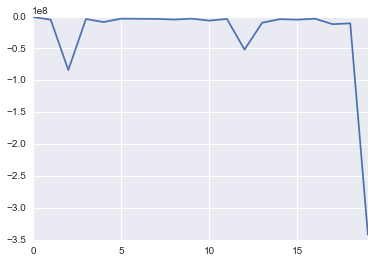

In [150]:
v = []
for t in range(20):
    v.append(log_likelihood(B, U, C, V, mu, A))
    print v[t]
    B, U, C, V = update_params(B, U, C, V)
pd.Series(v).plot()

In [ ]:
def clip(z):
    if z < 1:
        return 1
    if z >= 1 and z <= 5:
        return z
    if z > 5:
        return 5